<a href="https://colab.research.google.com/github/eliza0shrug/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Copy_of_Copy_of_LS_DS5_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

In [4]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [15]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head()

In [0]:
lifespan.head()

In [0]:
population.head()

In [0]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
concepts.head()

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
df = income.merge(lifespan).merge(population)

In [17]:
df.shape

(40437, 5)

## Explore data

In [18]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
reduced_entities = entities[['country', 'name','world_6region']]

In [0]:
df = pd.merge(df, reduced_entities, left_on='geo', right_on='country')

In [0]:
df = df.drop(columns=['geo', 'country'], axis='columns')

In [29]:
df = df.rename(columns = {
     'time': 'year',
     'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
     'life_expectancy_years': 'lifespan',
     'population_total': 'population',
     'world_6region': 'region'})

df.tail()

,year,income,lifespan,population,name,region
40432,2014,1908,56.99,15411675,Zimbabwe,sub_saharan_africa
40433,2015,1891,58.27,15777451,Zimbabwe,sub_saharan_africa
40434,2016,1860,59.27,16150362,Zimbabwe,sub_saharan_africa
40435,2017,1907,59.80,16529904,Zimbabwe,sub_saharan_africa
40436,2018,1952,60.18,16913261,Zimbabwe,sub_saharan_africa


In [0]:
df['region'] = df['region'].replace('_','', regex=True).str.title()

In [0]:
df.head

In [32]:
df.income.skew()

6.3005824038561125

In [33]:
df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

In [35]:
df[df['year'] == 2018].skew()

year          0.000000
income        2.056521
lifespan     -0.506461
population    8.224550
dtype: float64

In [0]:
df[df['year'] == 1800.skew()]

In [36]:
df.describe(exclude='number')

,name,region
count,40437,40437
unique,187,6
top,Ecuador,Europecentralasia
freq,219,10778


In [0]:
usa = df[df['name'] == 'United States']

In [39]:
usa[usa['year'].isin([1818,1918,2018])]

,year,income,lifespan,population,name,region
38046,1818,2258,39.41,9879049,United States,America
38146,1918,9371,47.18,106721812,United States,America
38246,2018,54898,79.14,326766748,United States,America


## Plot visualization

## Analyze outliers

In [0]:
present = df[df['year'] == 2018]

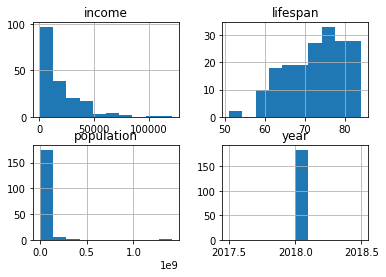

In [43]:
present.hist();

## Plot multiple years

In [50]:
pd.plotting.scatter_matrix

<function pandas.plotting._misc.scatter_matrix>

In [0]:
help(sns.relplot)

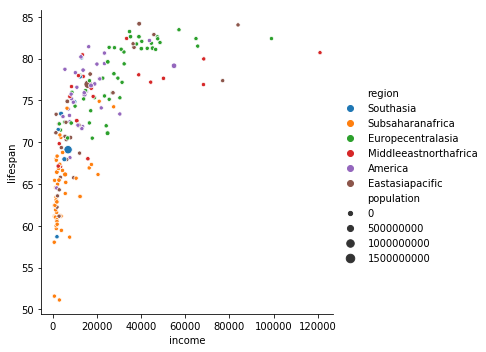

In [46]:
sns.relplot(x='income', y='lifespan',hue='region',size='population', data=present);

In [52]:
present['log_income'] = np.log(present['income'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
present.describe()

,year,income,lifespan,population,log_income
count,184.0,184.000000,184.000000,1.840000e+02,184.000000
mean,2018.0,17918.809783,72.654511,4.126209e+07,9.170772
std,0.0,19598.831373,7.249927,1.487751e+08,1.225316
min,2018.0,629.000000,51.120000,9.523500e+04,6.444131
25%,2018.0,3527.500000,67.130000,2.831068e+06,8.168329
50%,2018.0,11851.000000,74.015000,9.496864e+06,9.380024
75%,2018.0,25035.250000,78.022500,3.059006e+07,10.127984
max,2018.0,121033.000000,84.170000,1.415046e+09,11.703819


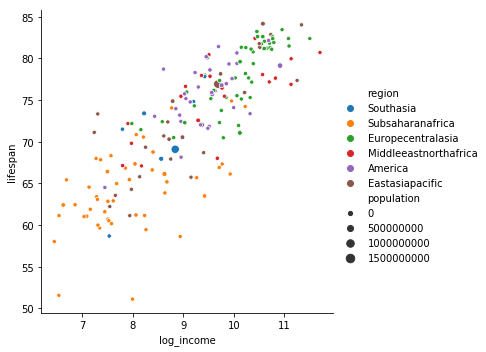

In [55]:
sns.relplot(x='log_income', y='lifespan',hue='region',size='population', data=present);

In [0]:
present[present['log_income'] <=11].sort_values(by='log_income')

In [0]:
qatar = present[present['name'] == 'Qatar']
qatar_income = qatar['log_income'].iloc[0]
qatar_lifespan = qatar['lifespan'].iloc[0]

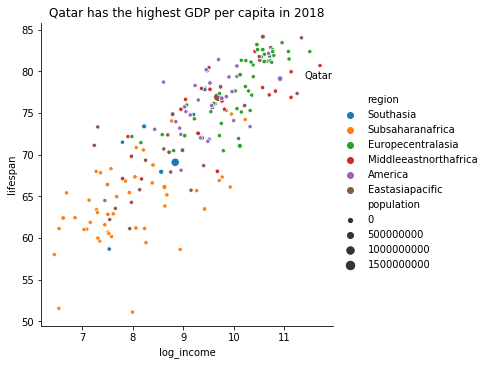

In [68]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population', data=present)
plt.text(x=qatar_income-.3, y=qatar_lifespan-1.6, s='Qatar')
plt.title("Qatar has the highest GDP per capita in 2018");

## Point out a story

In [0]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
             data=df[df['year'] == year ])
  plt.xscale('log')
  plt.title('year')
  plt.xlim(150, 150000)
  plt.ylim(10,90)

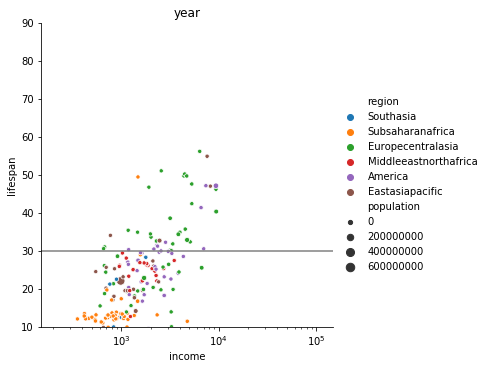

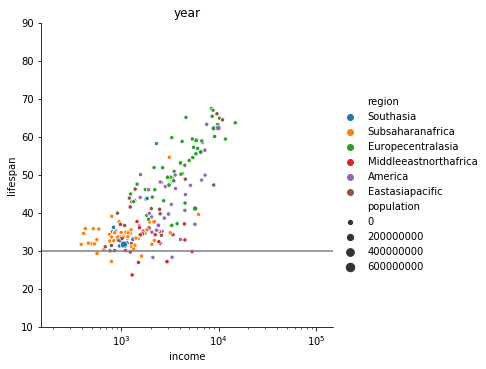

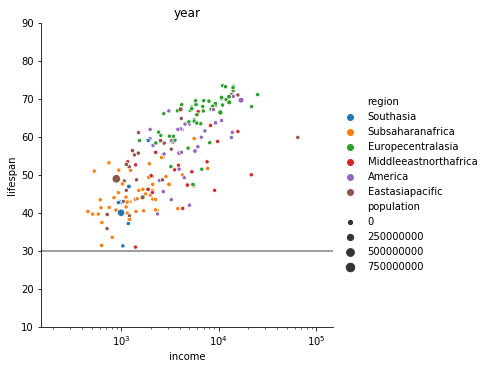

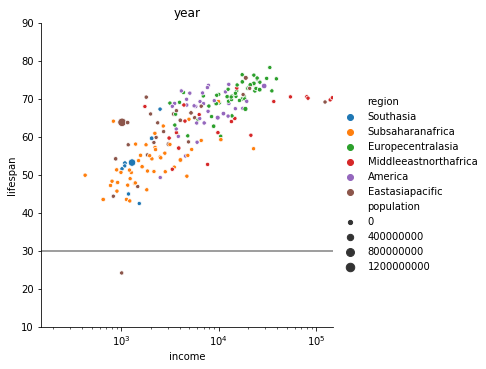

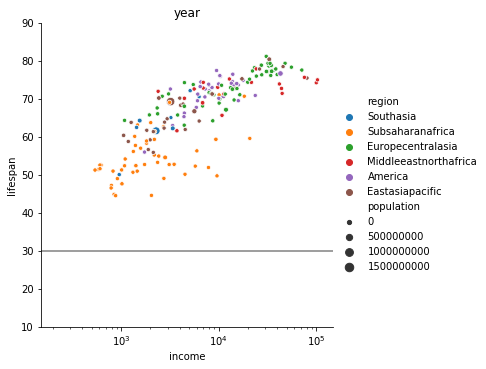

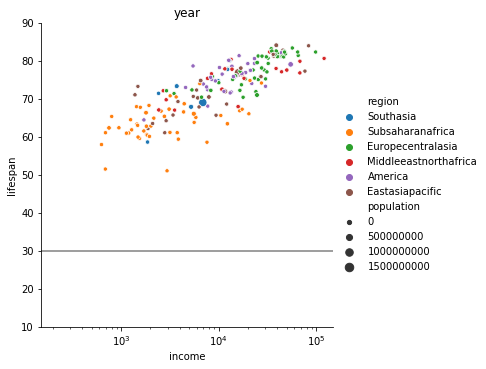

In [76]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
             data=df[df['year'] == year ])
  plt.xscale('log')
  plt.title('year')
  plt.xlim(150, 150000)
  plt.ylim(10,90)
  plt.axhline(y=30, color='gray')

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project